# Model Benchmark

**Purpose of script:**

Benchmarking regression models.
Two types of benchmarks are produced:
- Microwave benchmark: raw data input to output benchmark - direct comparison of microwave and optical data.
- Mean value benchark: mean value of training data lables is derived to check benchmark performance. 


In: training data: can be plain (not enhanced) df or extended df (but only mw data will be used).

Out: no written output, benchmark performance.

In [1]:
import pandas as pd
import functions_training_pipeline as f

import matplotlib.pyplot as plt

In [2]:
df_path = r"../../AWS_Data/Data/dataframe_extended/"

<mark>Define training and testing periods:</mark>


In [3]:
train_date_from = '2019-07-01'
train_date_to = '2019-07-02'

test_date_from = '2019-07-06'
test_date_to = '2019-07-07'

## Load Data

In [4]:
df_train = f.import_data(train_date_from, train_date_to, df_path)  
df_test = f.import_data(test_date_from, test_date_to, df_path)      

# remove nans function TBD   

100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


## Mean benchmark

In [10]:
y_predictions_mean = f.model_meanBenchmark(df_train['opt_value'], df_test['opt_value'])
print(f"Mean benchmark RMSE on test set: {f.get_rmse(df_test['opt_value'], y_predictions)}")

Mean benchmark RMSE on test set: 0.9105194211006165


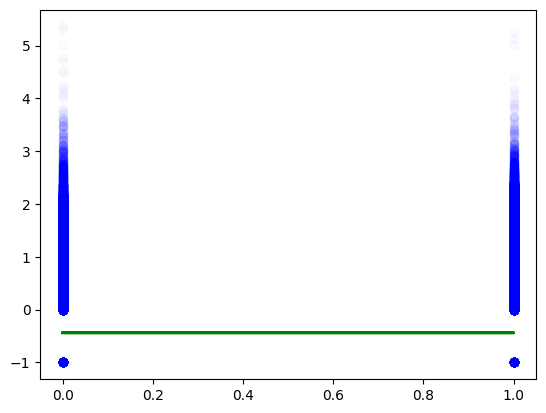

In [11]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.scatter(df_test['mw_value'], df_test['opt_value'],  color='blue', alpha = 0.02)
ax.plot(df_test['mw_value'], y_predictions_mean, color='red', linewidth=2)
# here nans not removeed thus these results

## Microwave benchmark

In [12]:
y_predictions_mw = f.model_mwBenchmark(df_test)
print(f"Microwave benchmark RMSE on test set: {f.get_rmse(df_test['opt_value'], y_predictions_mw)}")

Microwave benchmark RMSE on test set: 0.9105194211006165


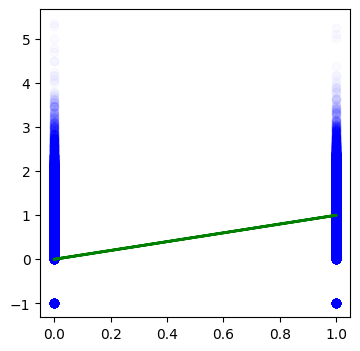

In [13]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.scatter(df_test['mw_value'], df_test['opt_value'],  color='blue', alpha = 0.02)
ax.plot(df_test['mw_value'], y_predictions_mw, color='red', linewidth=2)
# here nans not removeed thus these results

In [ ]:
# plot both datasets and show overlap (with grid for melting mw values)

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None

import functions_training_pipeline as f

In [2]:
df_path = r"../Data/combined/dataframe_extended/" # combines added

# date_from = "2017-05-01"
# date_to = "2019-07-31"
date_from = "2019-05-01"
date_to = "2019-05-01"

In [3]:
data = f.import_data(date_from, date_to, df_path)
data = f.remove_data(data, removeMaskedClouds=True, removeNoMelt=True)
data = f.data_normalization(data)

100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


In [4]:
print("Mean benchmark")
mean_benchmark_model = f.Model(model= None, name="MeanBenchmark")
columns = ['mw_value']
mean_benchmark_model.spatial_cv_mean_benchmark(data, columns)

Mean benchmark
Microwave benchmark RMSE on test set: 1.1099820137023926
Microwave benchmark R2 on test set: -139.5463290464355


In [6]:
print("Microwave benchmark")
y_predictions_mw = f.model_mwBenchmark(data)
print(f"Microwave benchmark RMSE on test set: {mean_squared_error(data['opt_value'], data['mw_value'])}")
print(f"Microwave benchmark R2 on test set: {r2_score(data['opt_value'], data['mw_value'])}")

Microwave benchmark
Microwave benchmark RMSE on test set: 0.09513110667467117
Microwave benchmark R2 on test set: -3.3255628336835077
